In [1]:
import numpy as np
import pandas as pd
from ts_agent import *

# Create agent
agent = TimeSeriesAgent()

# Create sample data directly in context
dates = pd.date_range("2024-01-01", periods=365, freq="D")
values = np.sin(np.arange(365) * 2 * np.pi / 7) + np.random.randn(365) * 0.1

agent.ctx.data = pd.DataFrame({"date": dates, "value": values})
agent.ctx.original_data = agent.ctx.data.copy()
agent.ctx.data_name = "sine_wave"
agent.ctx.freq_cache = "D"

print("\n" + "=" * 70)
print("Testing TimeSeriesAgent")
print("=" * 70)

# Test 1: Get info
print("\n1. Get data info:")
result = agent.get_info()
print(result)

# Test 2: Detect anomalies
print("\n2. Detect anomalies:")
result = agent.detect_anomalies(method="zscore", threshold=3.0)
print(result)

# Test 3: Comprehensive analysis (uses tool-to-tool calling internally)
print("\n3. Comprehensive analysis:")
result = agent.analyze(include_plots=False)
print(result)

# Test 4: Call tool directly
print("\n4. Detect trend (direct call):")
result = agent.call_tool_directly("detect_trend")
print(result)

print("\n" + "=" * 70)
print("✅ All tests passed!")
print("=" * 70)


✓ Loaded 30 tools from skills source(s)

Testing TimeSeriesAgent

1. Get data info:
{
  "loaded": true,
  "name": "sine_wave",
  "n_records": 365,
  "date_range": [
    "2024-01-01 00:00:00",
    "2024-12-30 00:00:00"
  ],
  "value_columns": [
    "value"
  ],
  "is_multivariate": false,
  "freq_inferred": "D",
  "value_missing": 0,
  "value_min": -1.132434579288612,
  "value_max": 1.197077083023606
}

2. Detect anomalies:
{
  "status": "ok",
  "summary": {
    "value": {
      "n_anomalies": 0,
      "anomaly_rate": 0.0
    }
  }
}

3. Comprehensive analysis:
{
  "steps": [
    {
      "step": "statistics",
      "data": {
        "value": {
          "mean": 0.008318951038662375,
          "median": -0.010144042194094488,
          "std": 0.7126873769720283,
          "min": -1.132434579288612,
          "max": 1.197077083023606,
          "q25": -0.6808949309540479,
          "q75": 0.7368092964368742
        }
      }
    },
    {
      "step": "stationarity",
      "data": {
     

✓ Loaded 30 tools from skills source(s)
✓ Loaded 365 days of sales data into agent

Asking LLM to analyze the data...



Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertModel LOAD REPORT from: BAAI/bge-base-en-v1.5
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.



--- Iter 1 • session=b3c242e7 ---

[context→llm (iter 1)]
01. system
You are a time series analysis expert assistant.

You have access to comprehensive time series analysis tools including:
- Data loading and inspection
- Data cleaning and preprocessing
- Statistical analysis and tests
- Trend and seasonality detection
- Anomaly detection
- Forecasting (classical and neural methods)
- Visualization

When analyzing time series:
1. Start by loading and inspecting the data
2. Check for missing values and outliers
3. Analyze stationarity and seasonality
4. Apply appr

[... truncated 11138 chars ...]
02. user
I have daily sales data loaded for 2024. Please:

1. Give me basic statistics
2. Analyze the trend - is it growing?
3. Check for weekly seasonality
4. Find any anomalies (unusual days)
5. Forecast the next 30 days
6. Summarize your findings for a business report
03. system
[Iteration memory]
Already executed tool calls in this run: none yet.
Do NOT repeat identical tool calls once too

07:04:33 | INFO     | lightning_fabric.utilities.seed: Seed set to 1


{
  "status": "error",
  "error": "tft failed: Set val_size>0 if early stopping is enabled."
}

--- Iter 7 • session=b3c242e7 ---

[context→llm (iter 7)]
01. user
I have daily sales data loaded for 2024. Please:

1. Give me basic statistics
2. Analyze the trend - is it growing?
3. Check for weekly seasonality
4. Find any anomalies (unusual days)
5. Forecast the next 30 days
6. Summarize your findings for a business report
02. system
[Tool-calling rule] Return EXACTLY ONE tool_call per response. Do not batch calls. Pick the single next-best tool.
03. tool(compute_statistics)
{
  "mean": 110.11445111314362,
  "median": 110.13083861776212,
  "std": 13.082978006517985,
  "min": 75.54063057749738,
  "max": 156.99424709048037,
  "q25": 100.49509301295203,
  "q75": 119.47178755565982
}
04. tool(detect_trend)
{
  "value": {
    "trend": "upward",
    "slope": 0.05258040610250605,
    "percent_change": 17.61644308182754,
    "start_value": 101.57745330943337,
    "end_value": 119.47178755565982

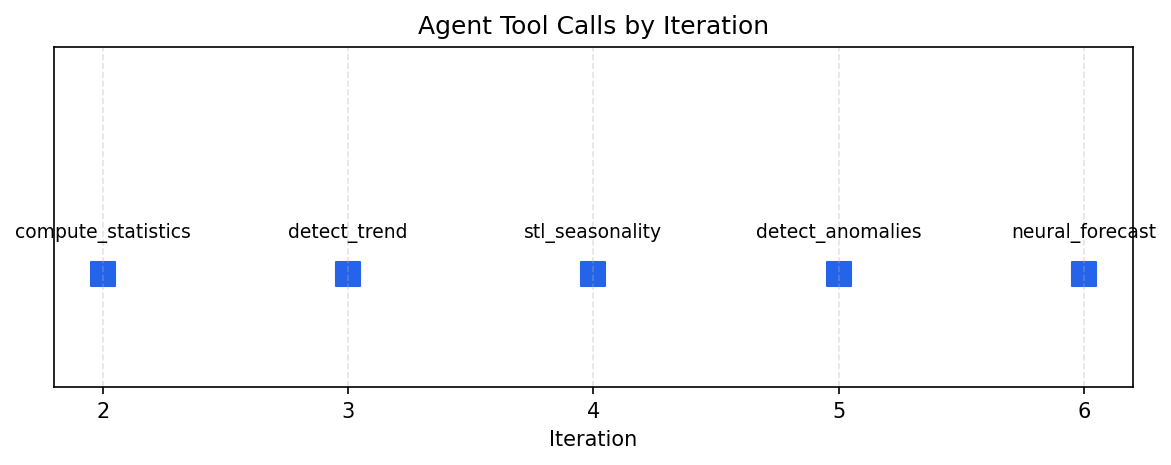

plots/tool_calls_timeline.png


In [2]:
from numpy.testing import verbose
"""
Simple Sample: Time Series Analysis with TimeSeriesAgent

Uses the actual agent API - loads data directly into ctx.
"""

import numpy as np
import pandas as pd
from src import plot_tool_calls_by_iteration


# ==================== Setup ====================

# Create agent
agent = TimeSeriesAgent(
    llm_url="http://localhost:8080",
    chat_template="chatml",
)

# Generate sample data (1 year daily sales)
dates = pd.date_range("2024-01-01", periods=365, freq="D")
trend = np.linspace(100, 120, 365)
seasonal = 15 * np.sin(2 * np.pi * np.arange(365) / 7)
noise = np.random.randn(365) * 3
values = trend + seasonal + noise

# Add a few anomalies
anomaly_days = [50, 150, 250, 300]
values[anomaly_days] += [40, -35, 45, -30]

# Create DataFrame
df = pd.DataFrame({"date": dates, "value": values})

# Load directly into agent context
agent.ctx.data = df
agent.ctx.original_data = df.copy()
agent.ctx.data_name = "daily_sales_2024"
agent.ctx.freq_cache = "D"

print(f"✓ Loaded {len(df)} days of sales data into agent")


# ==================== Let LLM Analyze ====================

print("\n" + "="*70)
print("Asking LLM to analyze the data...")
print("="*70 + "\n")

# The LLM will decide which tools to use
response = agent.agent.run("""
I have daily sales data loaded for 2024. Please:

1. Give me basic statistics
2. Analyze the trend - is it growing?
3. Check for weekly seasonality
4. Find any anomalies (unusual days)
5. Forecast the next 30 days
6. Summarize your findings for a business report

""", verbose=True)

print(response.__dict__)
out = plot_tool_calls_by_iteration(
    response,
    save_path="plots/tool_calls_timeline.png",
    show=True,   # False to only save
)
print(out)

In [1]:
"""
Simple sample: direct skill/tool execution without LLM
"""
import numpy as np
import pandas as pd

from ts_agent import create_timeseries_agent

# Create TimeSeriesAgent
tsa = create_timeseries_agent()

# Generate sample data (1 year daily sales)
dates = pd.date_range("2024-01-01", periods=365, freq="D")
trend = np.linspace(100, 120, 365)
seasonal = 15 * np.sin(2 * np.pi * np.arange(365) / 7)
noise = np.random.randn(365) * 3
values = trend + seasonal + noise

# Add anomalies
anomaly_days = [50, 150, 250, 300]
values[anomaly_days] += [40, -35, 45, -30]

# Build DataFrame
df = pd.DataFrame({"date": dates, "value": values})

# Load into shared context used by tools
tsa.ctx.data = df
tsa.ctx.original_data = df.copy()
tsa.ctx.data_name = "daily_sales_2024"
tsa.ctx.freq_cache = "D"

print(f"Loaded {len(df)} rows into context")

# Direct tool call (no LLM)
out = tsa.agent.run_tool_direct(
    "get_data_info",
    arguments={},
    persist_to_history=False,
)
print(out)


ImportError: cannot import name 'create_timeseries_agent' from 'ts_agent' (/data/back_home/baseline/foreblocks/work2/agent/ts_agent.py)

In [3]:
print(response.__dict__.keys())

dict_keys(['messages', 'tool_calls', 'iterations', 'final_response', 'debug', 'trace_md'])


In [4]:
print(response.messages)

[Message(role=<MessageRole.SYSTEM: 'system'>, content='You are a time series analysis expert assistant.\n\nYou have access to comprehensive time series analysis tools including:\n- Data loading and inspection\n- Data cleaning and preprocessing\n- Statistical analysis and tests\n- Trend and seasonality detection\n- Anomaly detection\n- Forecasting (classical and neural methods)\n- Visualization\n\nWhen analyzing time series:\n1. Start by loading and inspecting the data\n2. Check for missing values and outliers\n3. Analyze stationarity and seasonality\n4. Apply appropriate transformations if needed\n5. Perform requested analysis or forecasting\n6. Provide clear interpretations of results\n\nAlways use the available tools to perform analysis rather than making assumptions.\n\n\nTOOLS AVAILABLE (use only if needed):\nReturn EXACT JSON when calling:\nReturn exactly one tool_call per response.\n{"tool_call":{"name":"<tool_name>","arguments":{...}}}\n\n## Tool: acf_pacf_peaks\n**Description:*

In [5]:
print(response.iterations)

7


In [6]:
print(response.final_response)